## Zhentao Shi

* help system: `?`, '??'. eg. `?seq`, `??sequence`
* `c()`
* arithmetic
* logical vector `!=`, `&` vs `&&`, `any`, `all`
* factor
* character
* missing values `NA`, `NaN`
* index vector for selection `a[ ]`. Either positive integer or logical vector.

In [2]:
logi_1 = c(T,T,F)
logi_2 = c(F,T,T)

logi_12 = logi_1 & logi_2
print(logi_12)

[1] FALSE  TRUE FALSE


### Arrays 

* array arithematic. elementwise. 
* `%*%`, `solve`, `eigen`
* matrix

example: OLS estimator with one x regressor and a constant

[1] -0.5615293


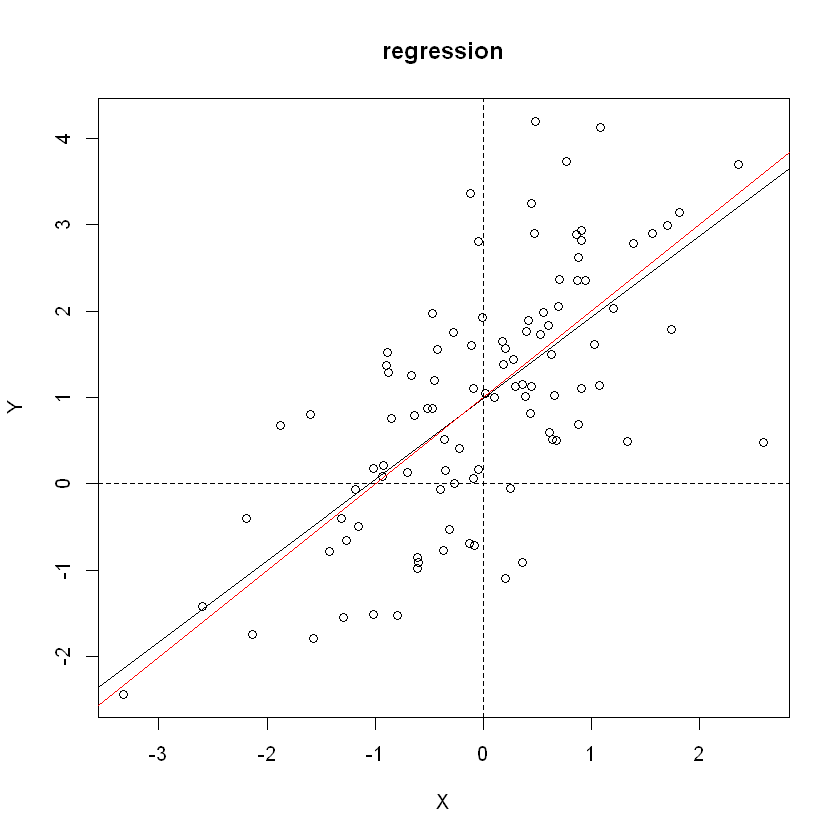

In [3]:
# check the OLS fitting
rm(list = ls( ) )
set.seed(111)

# set the parameters
n = 100
b0 = matrix(1, nrow = 2 )

# generate the data
e = rnorm(n)
X = cbind( 1, rnorm(n) ) # you can try this line. See what is the difference.
Y = X %*% b0 + e

# OLS estimation
bhat = solve( t(X) %*% X, t(X)%*% Y ) 

# plot
plot( y = Y, x = X[,2], xlab = "X", ylab = "Y", main = "regression")
abline( a= bhat[1], b = bhat[2])
abline( a = b0[1], b = b0[2], col = "red")
abline( h = 0, lty = 2)
abline( v = 0, lty = 2)

# calculate the t-value
bhat2 = bhat[2] # parameter we want to test
e_hat = Y - X %*% bhat
sigma_hat_square = sum(e_hat^2)/ (n-2)
sig_B = solve( t(X) %*% X  ) * sigma_hat_square
t_value_2 = ( bhat2 - b0[2]) / sqrt( sig_B[2,2] ) 
print(t_value_2)

### Mixed data types

* list
* data.frame

### Input and output

* `read.table()`
* `write.table()`


Example

```
HEX = read.csv("http://ichart.finance.yahoo.com/table.csv?s=0388.HK") 
print(head(HEX))
write.csv(HEX, file = "HEX.csv")
```

### Statitics

* `p`, `d`, `q`, `r`

example: 

1. plot the density of $\chi^2(3)$ over `x_axis = seq(0.01, 15, by = 0.01)`
2. generate 1000 observations for the above distribution. plot the kernel density.
3. calculate the 95-th quantile and the empirical probability of observing a value greater than the 95-th quantile.

[1] 0.047

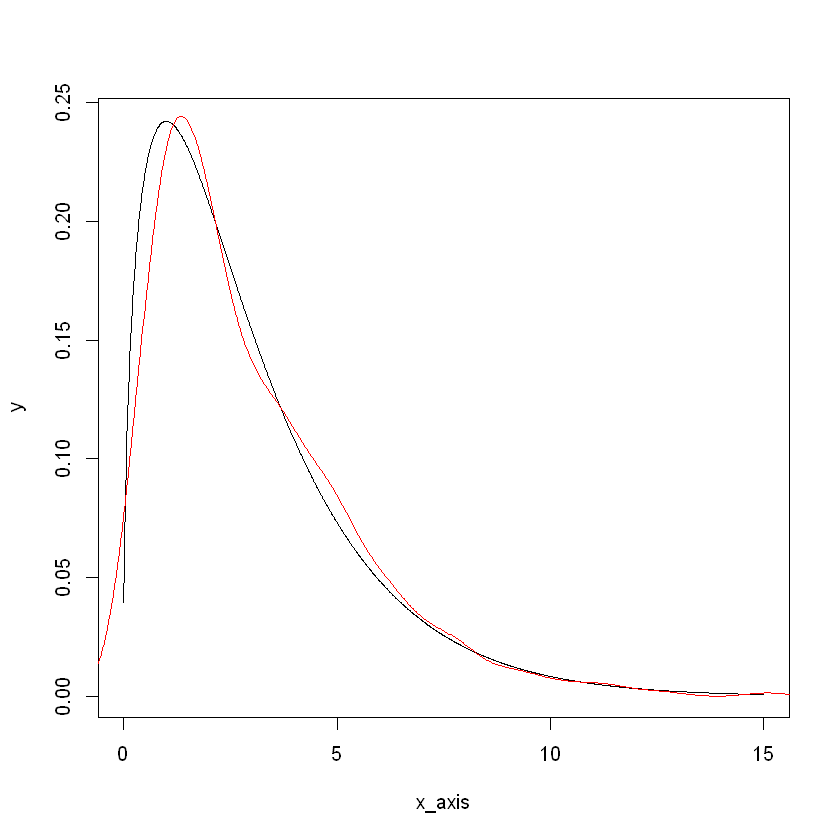

In [4]:
set.seed(888)
x_axis = seq(0.01, 15, by = 0.01)

y = dchisq(x_axis, df = 3)
plot(y = y, x=x_axis, type = "l")
z = rchisq(1000, df = 3)
lines( density(z), col = "red")
crit = qchisq(.95, df = 3)

mean( z > crit )

### Flow control

* `if`
* `for`, `while`

example: calculate the empirical coverage probability of a poisson distribution of degree of freedom 2.


In [6]:
# construct confidence interval

CI = function(x){
  # x is a vector of random variables
  
  n = length(x)
  mu = mean(x)
  sig = sd(x)
  upper = mu + 1.96/sqrt(n) * sig
  lower = mu - 1.96/sqrt(n) * sig
  return( list( lower = lower, upper = upper) )
}



Rep = 1000
sample_size = 100
capture = rep(0, Rep)


pts0 = Sys.time() # check time
for (i in 1:Rep){
  mu = 2
  x = rpois(sample_size, mu)
  bounds = CI(x)
  capture[i] = ( ( bounds$lower <= mu  ) & (mu <= bounds$upper) )
}
mean(capture) # empirical size
pts1 = Sys.time() - pts0 # check time elapse
print(pts1)

[1] 0.938

Time difference of 0.04803395 secs
